<a href="https://colab.research.google.com/github/RioAccountant/Project_1/blob/main/Copy_of_Project1_Work_in_Progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Description**:The purpose of this exercise is

1.   List item
2.   List item

to predict whether or not a future customer will make a transaction based on historical transactional data.

The number of variables provided (49) are to be equally evaluated and the data is similary structure as real data typically available to solve similar problems. The columns of the input variables have been intentionally masked to reduce or eliminate bias in the evaluation process and encourage fairness in the study.

The project will inclued Gaussian Naive Bayes classification techniques.

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv also annotated below.

##Load Libraries

In [1]:
#Step 2- Load the necessary library resources necessary to complete the project
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Get Data

In [2]:
### Step 3 Data Collection - Connect to the data store @  https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv
basepath = "df"
basepath = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv'
#initial pass through the datafile
df = pd.read_csv(basepath)
#create placeholders for training and test data
train_path = basepath + 'Anon.train.csv'
test_path = basepath + 'Anon.test.csv'

##Data Cleaning

In [3]:
### Step 4 Data Cleaning
#Seek to understand the data & look for items that may need to be cleaned ie., nulls, redundant.
# df.info() when run revealed that all are float64 and non-null within the population-cleared for brevity.



###Explore Data

In [4]:
df.shape

(180000, 53)

In [5]:
### Step 4 EDA View the head and the tail
df.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [6]:
### Step 4 EDA View the head and the tail
df.tail()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760
179999,179999,train_179999,0,11.6252,3.3959,11.5558,4.2003,7.4666,13.7381,12.9590,...,5.0415,-2.4210,-3.6829,14.2422,1.0741,26.3943,4.1482,11.9539,2.9846,15.6002


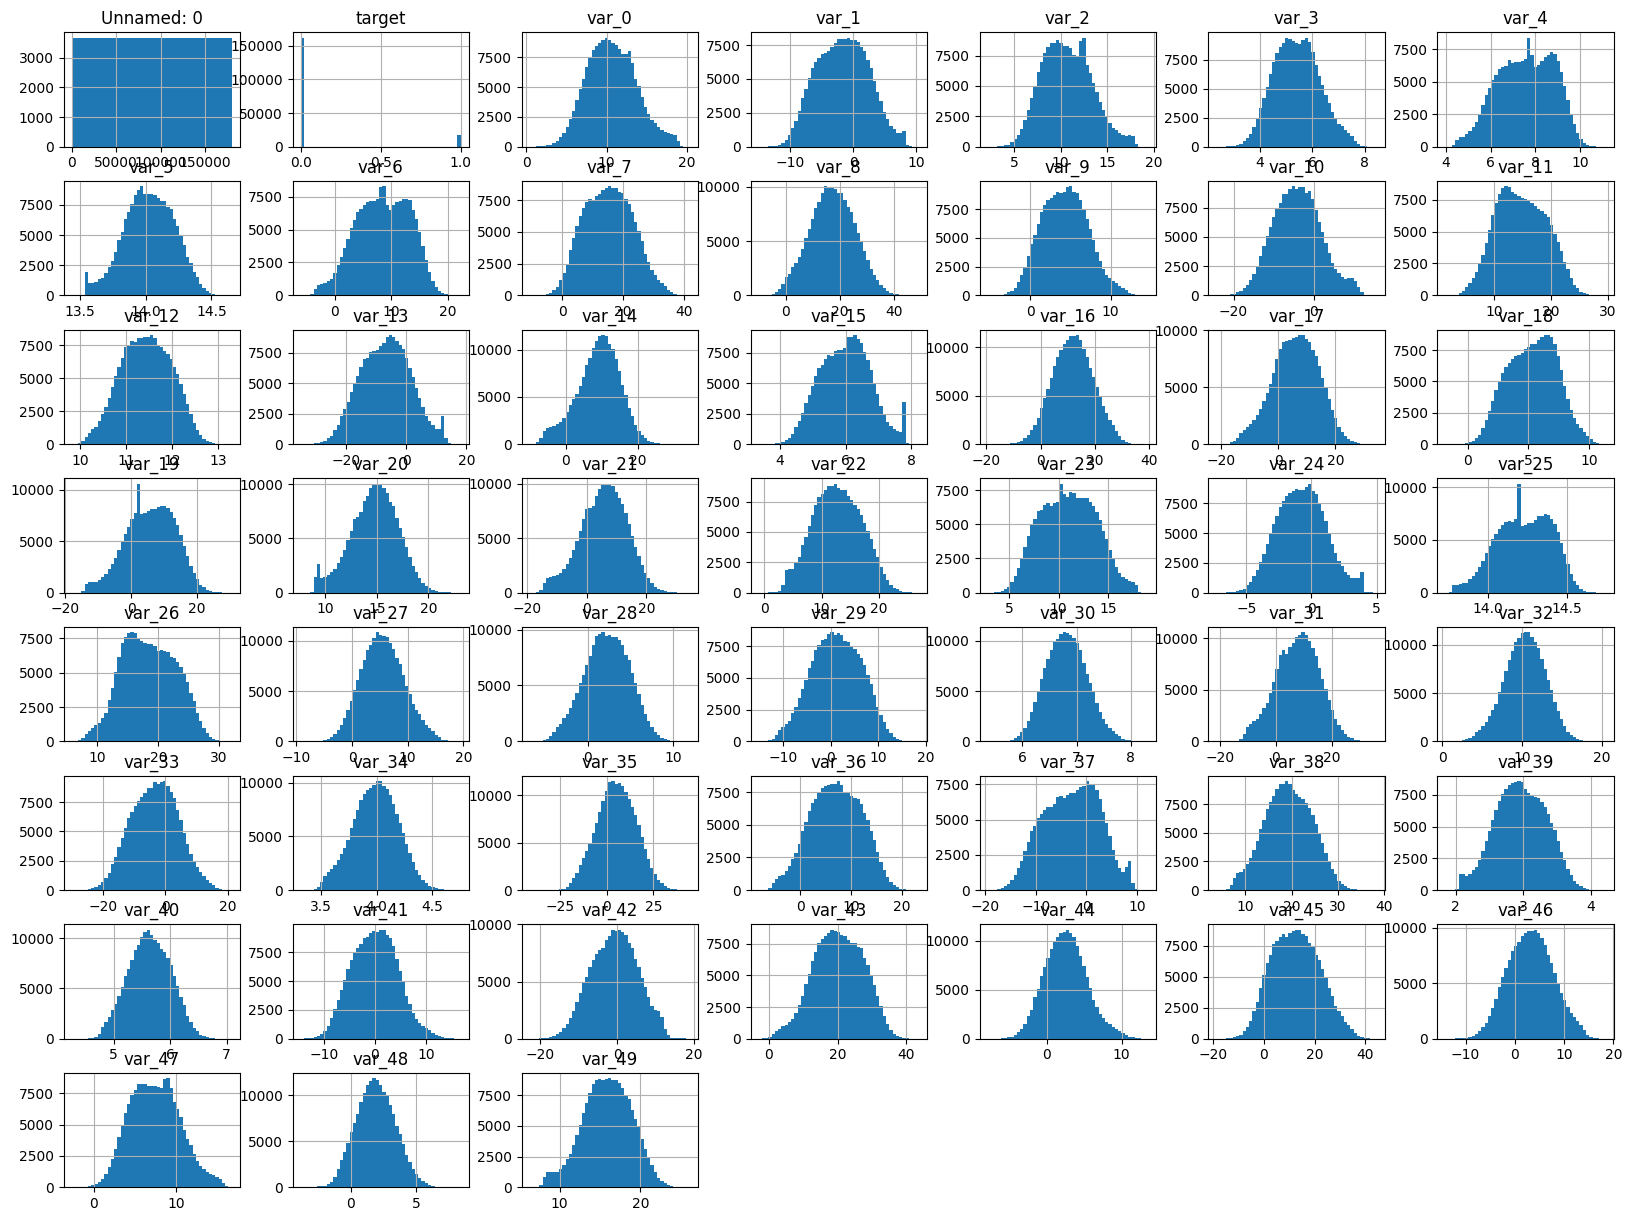

In [7]:
### Step 6 Initial visuals of the data-let's try a histogram.
df.hist(bins=49, figsize=(20,15))
plt.show()

In [8]:
### Step 7 to confirm there are different values in the target that are not evident from the head/tail view.
df['target'].value_counts()

,count
target,
0,161960
1,18040


##Additional Exploration

In [9]:
### 8 Generic correlation (quick view of)

corr = df.corr(numeric_only=True) #correlation matrix of copied and cleaned dataframe
print(corr)
#a quick visual display many small (by my definition) transations within multiple 'baskets'

            Unnamed: 0    target     var_0     var_1     var_2     var_3  \
Unnamed: 0    1.000000  0.000715  0.001324  0.002417  0.004805  0.001110   
target        0.000715  1.000000  0.052904  0.049916  0.055450  0.066924   
var_0         0.001324  0.052904  1.000000 -0.002155  0.006632  0.007155   
var_1         0.002417  0.049916 -0.002155  1.000000  0.005644  0.002640   
var_2         0.004805  0.055450  0.006632  0.005644  1.000000  0.000679   
var_3         0.001110  0.066924  0.007155  0.002640  0.000679  1.000000   
var_4         0.000795 -0.042073 -0.002247 -0.000408 -0.001293 -0.006768   
var_5         0.000215 -0.070015 -0.003147 -0.002629 -0.002718 -0.002568   
var_6         0.005908 -0.054375 -0.001717 -0.001234 -0.009171 -0.005282   
var_7        -0.000257  0.044769  0.004266 -0.000374  0.003436  0.002685   
var_8        -0.000744 -0.057378  0.000289 -0.000378 -0.006433 -0.004835   
var_9        -0.001202  0.059227  0.002817  0.001282  0.000511  0.002293   
var_10      

##Build requisite dataframes

In [10]:
### Processing Step 9-Create dataframe w/successes & another with fails

#For dataframe 1
successes = df[df['target'] == 1].copy()

#For dataframe 2
fails = df[df['target'] == 0].copy()



In [11]:
#Step 10-Create addl frames: the predictor columns & another with the target value column values only

#For dataframe 3, keeping the predictors (var 0-49 only)
predictors = df.copy()
predictors.drop('Unnamed: 0', axis=1, inplace=True)
predictors.drop('ID_code', axis=1, inplace=True)
predictors.drop('target', axis=1, inplace=True)

#For dataframe 4, keeping the isolated target
target = df['target'].copy()

#Initialize the Model

In [12]:
#11 Initialize the Gaussian Naïve Bayes model.
model = GaussianNB()

In [13]:
#12 Divide the two data frames you created in step #10 into training and testing subsets &

X = predictors #training set
y = target #test




In [14]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
179995,0
179996,0
179997,0
179998,0


##Train the Model

In [15]:
#train test split for 12
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# 12B Train the model using the training subset of the dataset.

model.fit(X_train, y_train)

GaussianNB()

##Test the model's accuracy score

In [17]:
#14 Test the model using the testing subset of the dataset. Calculate and report the accuracy.

y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#The accuracy is calculated to be 91% as rounded, but does not take into account the skewed population

Accuracy: 0.9088611111111111


###Note the initial score of 91%

In [18]:
#15 Perform a cross-validation loop to calculate the accuracy of your model. Report that accuracy. How does it compare to the accuracy you calculated in #14?
numLoops = 50

accuracy_scores = np.zeros(numLoops)
for idx in range(0, numLoops):

  X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20)
  model = GaussianNB()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy_scores[idx] = metrics.accuracy_score(y_test, y_pred)

accuracy_scores.mean()

#After looping the accuracy is consist at 91%, but again fails to consider the skewed population.

0.9112922222222223

###Loop around to retest

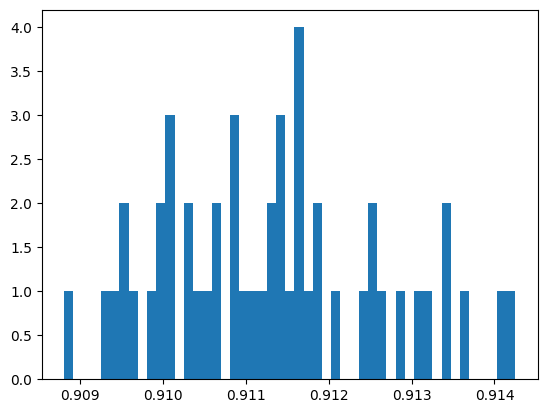

In [19]:
#16 Plot a histogram of the accuracy scores you generated in your cross-validation loop. What do you notice about the distribution of accuracy scores?
plt.hist(accuracy_scores, bins=49)
plt.show()
#see display of accuracy scores below all a visual reflection of the 91% when rounded

###Plot the results of the retesting

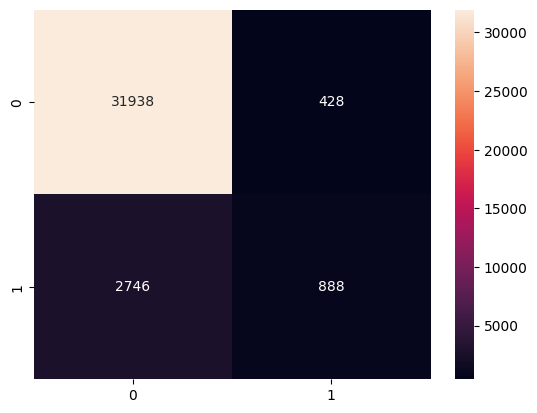

Confusion Matrix:
[[31938   428]
 [ 2746   888]]


In [20]:
#17 Present the confusion matrix and the results of your Classification Report (sklearn.metrics.classification_report). What do you notice?
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()
print("Confusion Matrix:")
print(confusion_matrix)
#The confusion matrix is highly weighted toward the top left which alligns to True/Positive and/or the 91% metric

#Place holder for next step for balance the population.

In [21]:
#18The training data is very skewed towards non-successful transactions(about 90% of the training data has ‘target’==0).
#Remove enough non-successful transaction rows so that your remaining training data is 50%/50% split between successful and non-successful transactions.
#18Hint: you can use the data frames you created in step #9.

In [22]:
#how do we drop 80% from the successful table, but why if above it was set at 20%-somehow have to do this with the 1's and zero's
#num_sucessess = len(successes*.8)

#num_fails = len(fails)
#balanced_df = pd.concat([successes, fails], ignore_index=True)
#balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)